In [43]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split # data splitting
from sklearn.linear_model import LogisticRegression # model Logistic Reg
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [44]:
wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [45]:
wine = wine.dropna()

In [46]:
wine['quality'] = [1 if i>6 else 0 for i in wine['quality']]
wine['quality'].value_counts()

0    421
1     98
Name: quality, dtype: int64

In [47]:
X = wine[['density','alcohol']]
y = wine['quality']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,random_state=2020, test_size=0.2)

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [50]:
confusion_matrix(y_test, y_pred)

array([[81,  3],
       [12,  8]], dtype=int64)

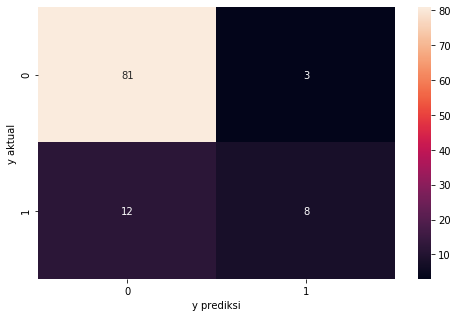

In [51]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

- TP = 8
- FP = 3
- FN = 12
- TN = 81

In [52]:
print(classification_report(y_test, y_pred))

# support adalah jumlah data test

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        84
           1       0.73      0.40      0.52        20

    accuracy                           0.86       104
   macro avg       0.80      0.68      0.72       104
weighted avg       0.84      0.86      0.84       104



In [58]:
print('Precision score: ', precision_score(y_test, y_pred))

Precision score:  0.7272727272727273


In [55]:
print('Recall score: ',recall_score(y_test, y_pred, pos_label=1))
# default pos_label=1 (recall positive)
# urutannya y_test dulu baryu y_pred

Recall score:  0.4


In [61]:
print('Recall score (negative): ',recall_score(y_test, y_pred, pos_label=0))

Recall score (negative):  0.9642857142857143


In [59]:
print('f1 score: ', f1_score(y_test, y_pred))


f1 score:  0.5161290322580645


In [65]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.97448806, 0.02551194],
       [0.91897384, 0.08102616],
       [0.29882566, 0.70117434],
       [0.88731429, 0.11268571],
       [0.52968226, 0.47031774],
       [0.8107317 , 0.1892683 ],
       [0.77090603, 0.22909397],
       [0.97448755, 0.02551245],
       [0.88736097, 0.11263903],
       [0.87455323, 0.12544677],
       [0.8873427 , 0.1126573 ],
       [0.95417119, 0.04582881],
       [0.84545343, 0.15454657],
       [0.64705328, 0.35294672],
       [0.82886326, 0.17113674],
       [0.81082514, 0.18917486],
       [0.81099947, 0.18900053],
       [0.97448755, 0.02551245],
       [0.58972906, 0.41027094],
       [0.20766754, 0.79233246],
       [0.9676819 , 0.0323181 ],
       [0.95920292, 0.04079708],
       [0.90937858, 0.09062142],
       [0.97127829, 0.02872171],
       [0.82889781, 0.17110219],
       [0.77070518, 0.22929482],
       [0.90940869, 0.09059131],
       [0.97128282, 0.02871718],
       [0.79162903, 0.20837097],
       [0.55970974, 0.44029026],
       [0.

In [72]:
pd.DataFrame(y_pred_proba).head()

,0,1
0,0.974488,0.025512
1,0.918974,0.081026
2,0.298826,0.701174
3,0.887314,0.112686
4,0.529682,0.470318


In [69]:
pd.DataFrame(y_pred).head()

,0
0,0
1,0
2,1
3,0
4,0


## Threshold

threshold = 0.5 (default)

setiap probability (true/1):
- prob <0.5 menjadi 0
- prob >0.5 menjadi 1